<a href="https://colab.research.google.com/github/malakmlk/ML/blob/main/Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP ANAD ACP**
## **SAIEM MALAK SIQ2**



# ***1.Loading the data from kaggle***


In [ ]:
from google.colab import files
!pip install -q kaggle
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gpreda/covid-world-vaccination-progress                COVID-19 World Vaccination Progress                  36KB  2021-01-28 07:53:29           3059  
jorgesandoval/wind-power-generation                    Wind Power Generation Data                          245KB  2021-01-07 18:45:08            268  
google/android-smartphones-high-accuracy-datasets      Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            687  
ayushggarg/all-trumps-twitter-insults-20152021         All Trump's Twitter insults (2015-2021)             581KB  2021-01-20 16:51:05            563  
cdminix/us-drought-meteorological-data                 US Drought & Meteorological Data       

In [ ]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 13.8MB/s]


In [ ]:
#extracting data
import zipfile
zip_ref = zipfile.ZipFile('world-happiness.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mlxtend.data import iris_data #a supprimé
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()


# **2.Data visualization**



> ## **Déscription de la bdd**
  World Happiness Report est une étude  de l'état du bonheur dans le monde   faite en 2016 ,qui classe 155 pays selon leur niveau de bonheur.
> ## **Contenu de la bdd**
  Les deux premieres colonnes décrit le score de happiness et les classement des pays, les colonnes  qui suivent le score de bonheur estiment dans quelle mesure chacun des six facteurs - production économique, soutien social, espérance de vie, liberté, absence de corruption et générosité - contribue à rendre les évaluations de vie plus élevées dans chaque pays.










In [ ]:

df = pd.read_csv('/content/files/2016.csv')

df.head(10) 


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [ ]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


## **Matrice de corrolation**

In [ ]:
#cheking the corrolation matrix
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
import plotly.graph_objects as go
dfNew = df.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
 
    )
fig.show()

In [ ]:
df_=df.copy()
df_=df_.drop(df.columns[0],axis=1)
df_=df_.drop(df.columns[1],axis=1)
df_=df_.drop(df.columns[2],axis=1)
df_=df_.drop(df.columns[4],axis=1)
df_=df_.drop(df.columns[5],axis=1)



df_

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...
152,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


## **Visualize all the original dimensions**

In [ ]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:

features = [ 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color=df['Region']
)
fig.update_layout(
    autosize=False,
    width=3000,
    height=3000,
)
fig.update_traces(diagonal_visible=False)
fig.show()

# **3.Data reduction with PCA**

DATA NORMALIZATION

In [ ]:
x = StandardScaler().fit_transform(df_)
np.mean(x),np.std(x)

(-8.228636198727274e-18, 1.0)

In [ ]:
cov_matrix = np.cov(x.T)
cov_matrix[:]
values, vectors = np.linalg.eig(cov_matrix)
values=np.sort(values)[::-1]
values[:]

array([6.69883672e+00, 1.51281299e+00, 1.13585441e+00, 6.79460292e-01,
       5.32409540e-01, 3.58640043e-01, 1.43816737e-01, 6.80222914e-03,
       1.87977985e-03, 7.98317036e-08, 6.81089620e-17])

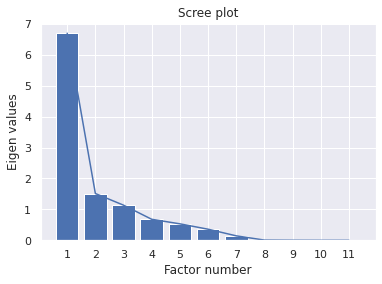

In [ ]:
#scree plot
plt.plot(np.arange(1,12),values)
columns = ['1', '2', '3','4', '5', '6','7', '8', '9','10', '11']
plt.bar(x= range(1,12), height=values, tick_label=columns)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

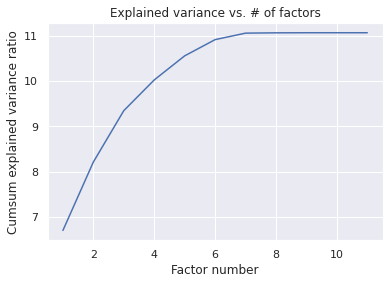

In [ ]:
#cumul de variance expliquée
plt.plot(np.arange(1,12),np.cumsum(values))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## **Projection des individus :**




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(x)
#Affichage de deux premiere composante
principal_Df = pd.DataFrame(data = principalComponents[:,[0,1]]  )
principal_Df


,0,1
0,-4.968767,1.461321
1,-4.984901,0.976311
2,-4.637372,0.581525
3,-4.857520,1.256423
4,-4.683515,0.759001
...,...,...
152,4.393355,0.443363
153,4.888367,0.306569
154,4.760238,0.420047
155,4.558590,2.212282


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
total_rate=pca.explained_variance_ratio_
#variance expliquée
eigval = pca.explained_variance_


Explained variation per principal component: [6.05106270e-01 1.36652476e-01 1.02601788e-01 6.13756836e-02
 4.80925815e-02 3.23959737e-02 1.29909733e-02 6.14445712e-04
 1.69800611e-04 7.21120196e-09 8.03934080e-33]


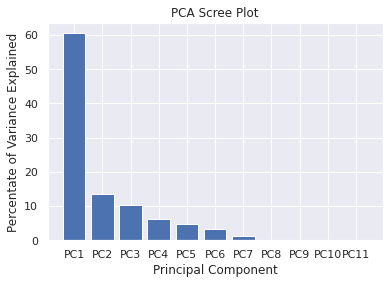

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)

plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

En visualisant cette arc on constate que la premiere composante représente 60% de l'information ,la 2em composante comporte environ 14 % de l'information

In [ ]:
groups = df.groupby('Region')

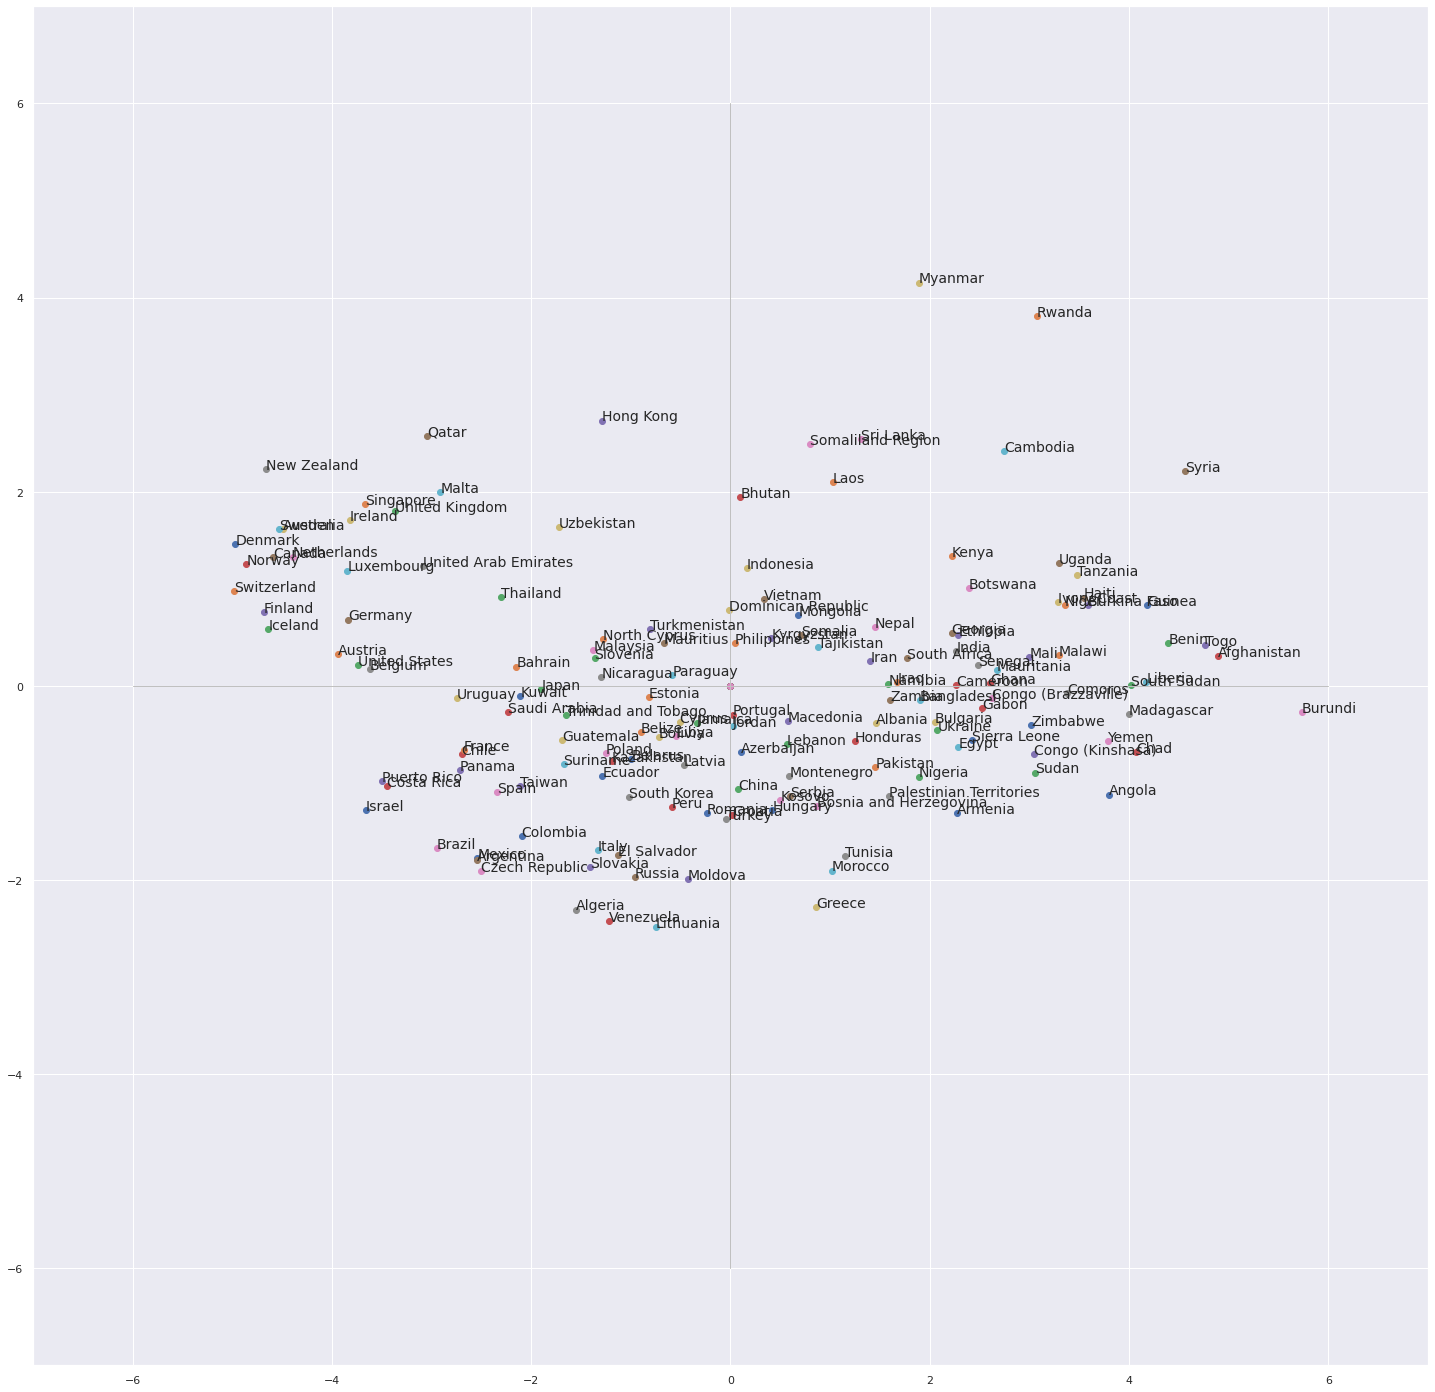

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(25,25))
axes.set_xlim(-7,7) #même limites en abscisse
axes.set_ylim(-7,7) #et en ordonnée
#placement des étiquettes des observations
for i in range(df.shape[0]):
 #plt.annotate(df.iloc[i]['Country'],(principalComponents[i,0],principalComponents[i,1]))
 plt.scatter([0, principalComponents[i,0]], [0, principalComponents[i,1]])
 plt.text(principalComponents[i,0],principalComponents[i,1],df.iloc[i]['Country'], fontsize='14')
#ajouter les axes

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Sur le graphe, des individus, du côté droit, nous observons les pays qui nous sont pas heaureux et qui ont un niveau de vie bas ,telle qe que Afghanistane, brundi, syria, tandis que sur le côté gauche, nous voyons germany,sweetzerland ... qio son des pays avec un score de happiness tres  élévé par rapport au pays qui se trouve a gauche.
les pays qui se trouve en haut sont plus généreux par rapport aux pays qui se trouve en bas.

In [ ]:


pca2 = PCA(n_components=2)
components2 = pca2.fit_transform(x)
total_var2 = pca2.explained_variance_ratio_.sum() * 100
fig = px.scatter(components2, x=0, y=1, color=df['Region'],title=f'Total Explained Variance: {total_var2:.2f}%',)
fig.show()



les pays qui se trouve en sub-sahran africa ont tendance a avoir un bas niveau de vie et un bas score de happiness ,par contre les western europe


In [ ]:

pca1 = PCA(n_components=3)
components3 = pca1.fit_transform(x)

total_var = pca1.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components3, x=0, y=1, z=2, color=df['Region'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID        d_i
0      0  29.159693
1      1  27.716284
2      2  24.302568
3      3  25.857555
4      4  25.117481
..   ...        ...
152  152  22.588586
153  153  26.348578
154  154  26.685905
155  155  37.001971
156  156  34.814231

[157 rows x 2 columns]


In [ ]:
#qualité de représentation des individus - COS2
cos2 = principalComponents**2
for j in range(11):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]}))

      id    COS2_1    COS2_2    COS2_3
0      0  0.846670  0.073233  0.020546
1      1  0.896557  0.034391  0.004628
2      2  0.884895  0.013915  0.012442
3      3  0.912519  0.061050  0.009423
4      4  0.873309  0.022936  0.017251
..   ...       ...       ...       ...
152  152  0.854483  0.008702  0.029093
153  153  0.906923  0.003567  0.025297
154  154  0.849133  0.006612  0.031383
155  155  0.561612  0.132268  0.090322
156  156  0.944604  0.002032  0.010104

[157 rows x 4 columns]


D'aprés les résultats trouvés on déduis que les individus don bien représenté sur la composante principal 1,par contre sur la 2éme composante ne sont pas bien représentés de méme pour la troisiéme composante.

In [ ]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((11,11))
for k in range(11):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
df_co=pd.DataFrame(corvar,index=df_.columns.values)

print(df_co)
#print(np.array(df_.columns.tolist()))


                                     0         1   ...            9             10
Happiness Rank                 0.989780  0.102287  ...  6.318876e-09 -4.343110e-31
Happiness Score               -0.993323 -0.087912  ... -1.038226e-04 -2.435405e-16
Lower Confidence Interval     -0.993649 -0.084498  ... -1.044526e-04  1.224496e-16
Upper Confidence Interval     -0.991955 -0.091269  ... -1.030777e-04  1.212177e-16
Economy (GDP per Capita)      -0.834442 -0.088222  ...  1.124793e-04 -4.049050e-30
Family                        -0.778740 -0.009518  ...  7.271459e-05 -2.558602e-30
Health (Life Expectancy)      -0.809210 -0.064422  ...  6.252187e-05 -2.243952e-30
Freedom                       -0.618866  0.512932  ...  3.967490e-05 -1.415926e-30
Trust (Government Corruption) -0.452436  0.595735  ...  3.026426e-05 -1.022613e-30
Generosity                    -0.181452  0.752796  ...  3.647120e-05 -1.266881e-30
Dystopia Residual             -0.427786 -0.531438  ...  1.478143e-04 -5.257969e-30

[11

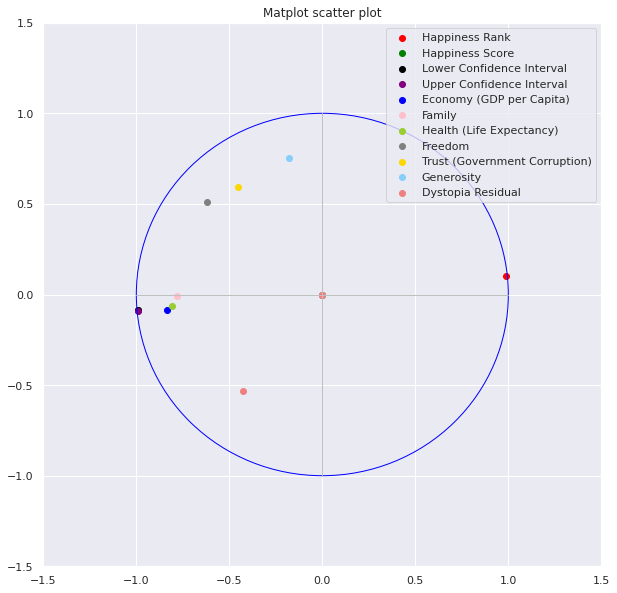

In [ ]:

#cercle des corrélations
colors=["red", "green","black","purple", "blue", "pink",'yellowgreen', "gray", 'gold', 'lightskyblue', 'lightcoral','brown']
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1.5,1.5)
axes.set_ylim(-1.5,1.5)
#affichage des étiquettes (noms des variables)
for j in range(0, pca.components_.shape[1]):
   #plt.annotate(df_.columns[j],(corvar[j,0],corvar[j,1]))
   plt.scatter([0, corvar[j,0]], [0, corvar[j,1]], color=colors[j],  label=df_.columns[j])
   #plt.text(corvar[j,0],corvar[j,1],df_.columns[j], fontsize='14')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title('Matplot scatter plot')
plt.legend(loc=1)
plt.show()


Le cercle des corrélations, variables-facteurs, montre que les variables hapiness.ranc,hapiness.score,lowe.confidence.interval,upper.confidence interval,economy,Family,health,Generosity sont 
bien expliquées par les 2 premières CP car tous les points se trouvent très près du
cercle unité.
1.    **première composante principale** est fortement corrélée avec la variable Happiness.Rank,elle augmente avec l'augmentation des classement des pays les plus happy,et elle est  corrélée négativement avec les six variables owe.confidence.interval,upper.confidence interval,Familly,Economy,health,donc on peut conclure que que cette composante nous permet de mesurer le niveau de vie, les pays à haute valeur ont tendance a avoir un niveau de vie bas.
2.   **la deuxiéme composante principale** augmente avec la generosities et la confiance.
3.   **la troisiéme composante principale** est fortement corrélé avec la dystopia.residual






In [ ]:
cos2var=0
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df_.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                               id    COS2_1    COS2_2
0                  Happiness Rank  0.979665  0.010463
1                 Happiness Score  0.986691  0.007729
2       Lower Confidence Interval  0.987338  0.007140
3       Upper Confidence Interval  0.983975  0.008330
4        Economy (GDP per Capita)  0.696293  0.007783
5                          Family  0.606436  0.000091
6        Health (Life Expectancy)  0.654820  0.004150
7                         Freedom  0.382995  0.263099
8   Trust (Government Corruption)  0.204698  0.354900
9                      Generosity  0.032925  0.566702
10              Dystopia Residual  0.183001  0.282427


In [ ]:
#contributions
ctrvar = cos2var
for k in range(11):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':df_.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))


                               id     CTR_1     CTR_2
0                  Happiness Rank  0.146244  0.006916
1                 Happiness Score  0.147293  0.005109
2       Lower Confidence Interval  0.147390  0.004720
3       Upper Confidence Interval  0.146887  0.005506
4        Economy (GDP per Capita)  0.103942  0.005145
5                          Family  0.090528  0.000060
6        Health (Life Expectancy)  0.097751  0.002743
7                         Freedom  0.057173  0.173914
8   Trust (Government Corruption)  0.030557  0.234596
9                      Generosity  0.004915  0.374602
10              Dystopia Residual  0.027318  0.186690


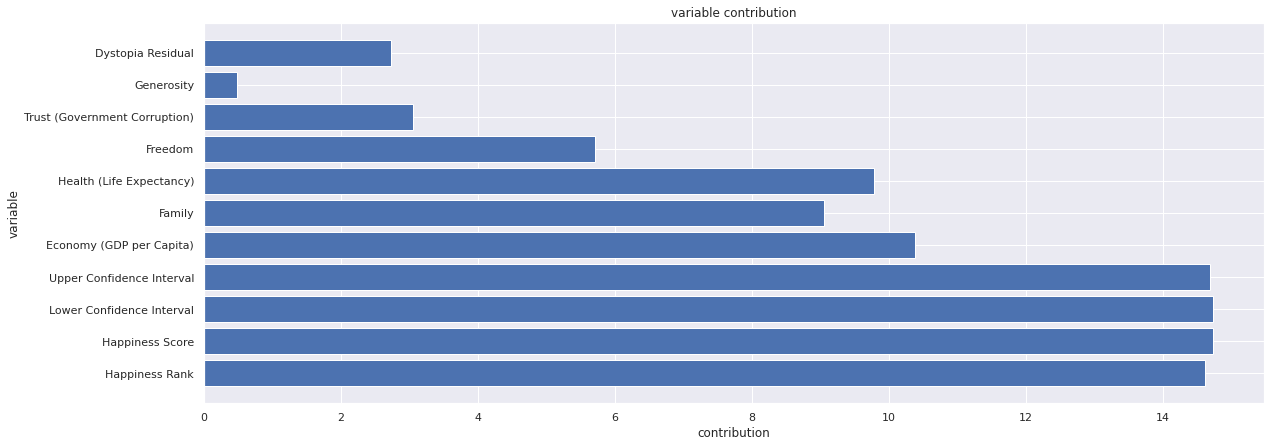

In [ ]:
percent_variance = np.round(ctrvar[:,0]* 100, decimals =2)
columns = df_.columns[:]
#fig  = plt(figsize=(14,14))

fig = plt.figure(figsize = (19, 7))
#plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.barh(columns,percent_variance)
plt.ylabel('variable')
plt.xlabel('contribution')
plt.title('variable contribution')
plt.show()